In [ ]:
>>> from sklearn.datasets import make_classification
>>> from sklearn.naive_bayes import GaussianNB
>>> from sklearn.linear_model import LogisticRegression, RidgeClassifier
>>> from sklearn.model_selection import train_test_split, GridSearchCV
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


#from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# cols = ['nums', 
# 'oov_rank', 
# 'stop_word', 
# 'oov_rank_no_punc', 
# 'punct_lemm', 
# 'punct', 
# 'word_len_no_punc', 
# 'word_len', 
# 'basic_rank_no_punc', 
# 'word_count_no_punct', 
# 'word_count', 
# 'sent_len', 
# 'aol_rank_no_punc_perc', 
# 'aol_rank_perc', 
# 'concreteness_rank_no_punc_perc', 
# 'concreteness_rank_perc',
# 'basic_rank', 
# 'mid_con', 
# 'bot_aol', 
# 'mid_aol', 
# 'top_aol', 
# 'bot_con', 
# 'top_con', 
# 'basic_sim',
# 'label']

cols = ['nums', 
'oov_rank', 
'stop_word', 
'oov_rank_no_punc', 
'punct', 
'word_len', 
'basic_rank_no_punc', 
'sent_len', 
'aol_rank_perc', 
'concreteness_rank_perc',
'basic_rank', 
'mid_con', 
'bot_aol', 
'mid_aol', 
'top_aol', 
'bot_con', 
'top_con', 
'basic_sim',
'label']


In [ ]:
df = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\finaldf_v3.csv')
df = df.drop(columns=['Unnamed: 0',	'Unnamed: 0.1'])#[cols]
import numpy as np
train_df, dev_df, test_df = \
              np.split(df.sample(frac=1, random_state=22), 
                       [int(.8*len(df)), int(.9*len(df))])

In [ ]:
>>> from sklearn.impute import SimpleImputer

train_df = train_df.select_dtypes('number')
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df = pd.DataFrame(imp_mean.fit_transform(train_df), columns=train_df.columns)

In [ ]:
X_train = train_df.drop(columns='label')
y_train = train_df['label']

In [ ]:
# log_clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=22)
# log_clf.fit(X_train, y_train)

In [ ]:
dev_df = dev_df.select_dtypes('number')
test_df = test_df.select_dtypes('number')


dev_df_trans = pd.DataFrame(imp_mean.transform(dev_df), columns=train_df.columns)
test_df_trans = pd.DataFrame(imp_mean.transform(test_df), columns=train_df.columns)


X_dev = dev_df_trans.drop(columns='label')
y_dev = dev_df_trans['label']

X_test = test_df_trans.drop(columns='label')
y_test= test_df_trans['label']

In [ ]:
# log_clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=22)
# nb_clf = GaussianNB()
# ridge_clf = RidgeClassifier(random_state=22)
dev_dict = {}
dev_dict['log'] = {}
dev_dict['ridge'] = {}
dev_dict['nb'] = {}

# log_clf.fit(X_train, y_train)
dev_dict['log']['train_score'] = log_clf.score(X_train , y_train)
dev_dict['log']['dev_score'] = log_clf.score(X_dev , y_dev)
dev_dict['log']['test_score'] = log_clf.score(X_test , y_test)


# nb_clf.fit(X_train, y_train)
dev_dict['nb']['train_score'] = nb_clf.score(X_train , y_train)
dev_dict['nb']['dev_score'] = nb_clf.score(X_dev , y_dev)
dev_dict['nb']['test_score'] = nb_clf.score(X_test , y_test)

# ridge_clf.fit(X_train,y_train)
dev_dict['ridge']['train_score'] = ridge_clf.score(X_train , y_train)
dev_dict['ridge']['dev_score'] = ridge_clf.score(X_dev , y_dev)
dev_dict['ridge']['test_score'] = ridge_clf.score(X_test , y_test)

In [ ]:
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train,y_train)

dev_dict['rf'] = {}
dev_dict['rf']['train_score'] = rf_clf.score(X_train , y_train)
dev_dict['rf']['dev_score'] = rf_clf.score(X_dev , y_dev)
dev_dict['rf']['test_score'] = rf_clf.score(X_test , y_test)

In [ ]:
pd.DataFrame(dev_dict).T

,train_score,dev_score,test_score
log,0.633681,0.630492,0.631835
ridge,0.632310,0.630516,0.630348
nb,0.602683,0.602659,0.599707
rf,0.991827,0.711807,0.711879


In [ ]:
# rf_clf.fit(X_train,y_train)

In [ ]:
# rf_clf.score(X_dev , y_dev)

In [ ]:
import pprint

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [100] #[int(x) for x in np.linspace(start = 200, stop = 600, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = []#[int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_cv = GridSearchCV(estimator = rf, param_grid=  random_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 114.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             verbose=2)

In [ ]:
type(rf_cv.cv_results_)

dict

In [ ]:
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

with open("data.json", "w") as f:
  json.dump(rf_cv.cv_results_, f, cls=NumpyEncoder)


In [ ]:
cv_df = pd.DataFrame([rf_cv.cv_results_['split0_test_score'],rf_cv.cv_results_['split1_test_score'],rf_cv.cv_results_['split2_test_score']])

In [ ]:
# cv_df.to_csv('cv.csv')
cv_df = pd.read_csv('cv.csv')

In [ ]:
# import seaborn as sns
# cv_df.plot(xticks=[0,1,2],figsize=(15, 10), legend=True, xlabel='cv')

In [ ]:
import matplotlib.pyplot as plt
import json

with open("data.json", "r") as f:
  dict = json.load(f)


In [ ]:
dict['params'][17]

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
[idx for idx,val in enumerate(dict['rank_test_score']) if val ==1]

[17]

In [ ]:
cv_df = cv_df.drop(columns=['Unnamed: 0'])

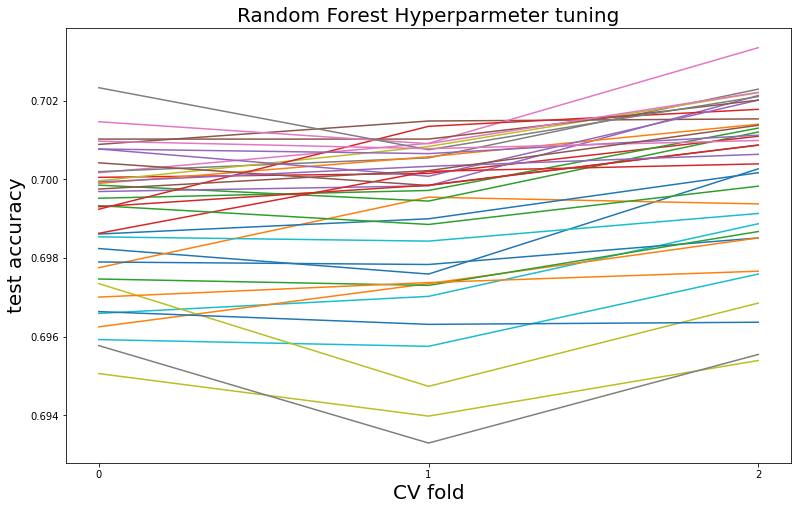

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 8))

for col in cv_df.columns:
  plt.plot(cv_df[col])
plt.xticks([0,1,2] )
plt.xlabel('CV fold', font={'size':20,}) 
plt.ylabel('test accuracy', font={'size':20,}) 
plt.title('Random Forest Hyperparmeter tuning', font={'size':20,})
plt.show()


In [ ]:
rf_random.score(X_train,y_train)

0.9696413467940759

In [ ]:
rf_dum = RandomForestClassifier()

In [ ]:
rf_dum.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_dum.score(X_train,y_train)

0.9918239785971795

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
# rf_v2 = RandomForestClassifier(n_estimators= 333,
#  min_samples_split = 5,
#  min_samples_leaf = 4,
#  max_features= 'sqrt',
#  max_depth = None,
#  bootstrap= True)

In [ ]:
rf_v2.fit(X_train,y_train)

In [ ]:
rf_v2.score(X_test , y_test)

# mutual info

In [ ]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(train_df.drop(columns='label'), train_df['label'])

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt




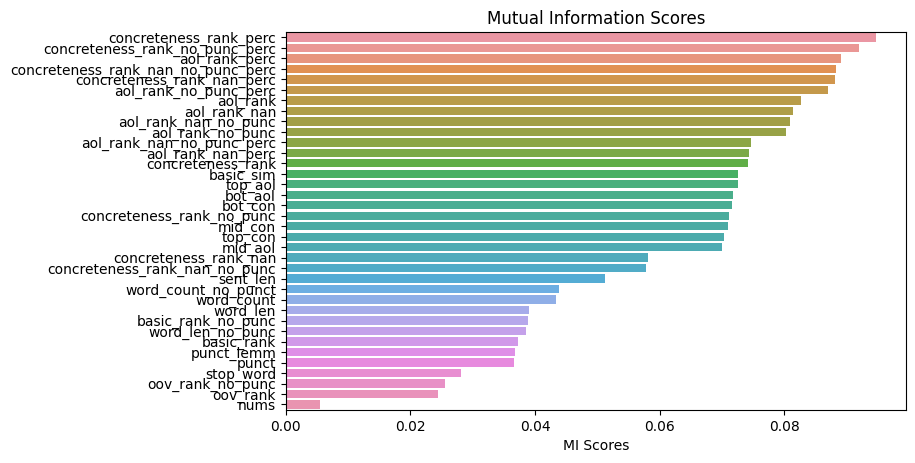

In [ ]:
%matplotlib inline
def plot_mi_scores(scores):
    import numpy as np
    import matplotlib.pyplot as plt
    scores = scores.sort_values(ascending=False)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    sns.barplot(x=scores, y=ticks)
    # plt.barh(width, scores)
    # plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    # print(ticks)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators= 600,
 min_samples_split = 10,
 min_samples_leaf = 4,
 max_features= 'sqrt',
 max_depth = None,
 bootstrap= False,)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=600)

In [ ]:

>>> from sklearn.metrics import plot_confusion_matrix
>>> from sklearn.model_selection import train_test_split

>>> import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize = (8,4))

ax[0].plot(plot_confusion_matrix(rf_clf, X_dev, y_dev))
ax[0].set_title('training data')  

# ax[1] = plot_confusion_matrix(rf_clf, X_dev, y_dev)
# ax[1].set_title('dev data')  

# ax[2] =plot_confusion_matrix(rf_clf, X_test, y_test)
# ax[2].set_title('test data')  

# fig.tight_layout()
# fig.suptitle('Confusion Matrices for Final Classifier')

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

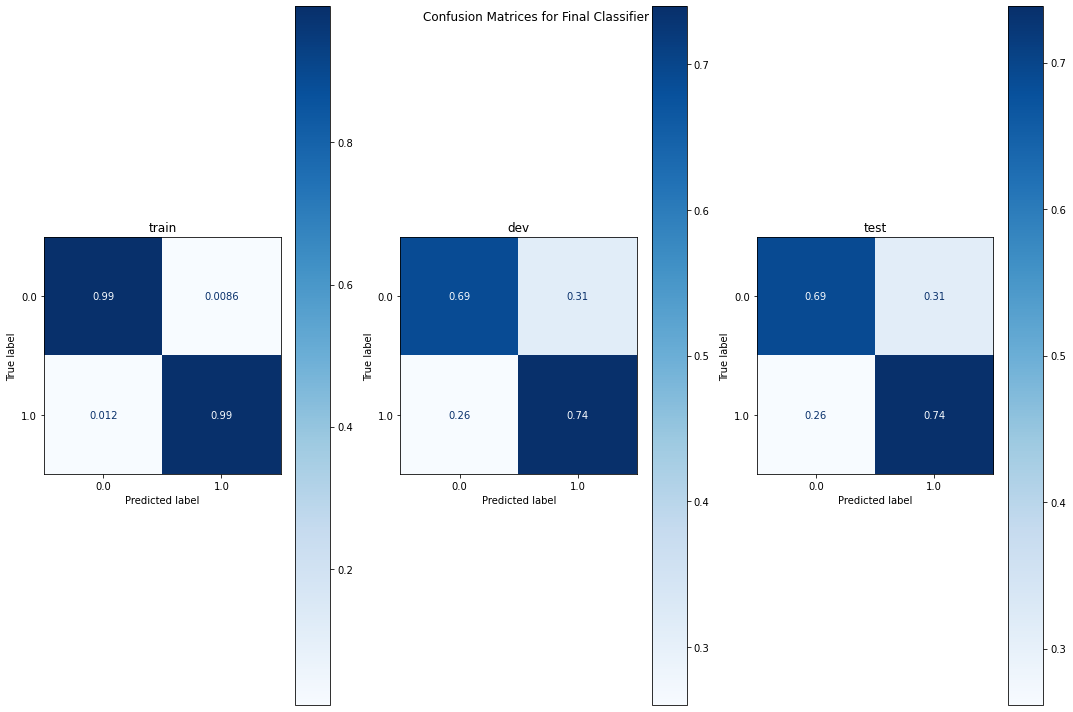

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

for dat, ax in zip(['train', 'dev', 'test'], axes.flatten()):
    plot_confusion_matrix(rf_clf, 
                          eval('X_' +dat), 
                          eval('y_' +dat), 
                          ax=ax, 
                          cmap='Blues',
                          normalize='true',

)   

    ax.title.set_text(dat)

fig.tight_layout()
fig.suptitle('Confusion Matrices for Final Classifier')
plt.show()

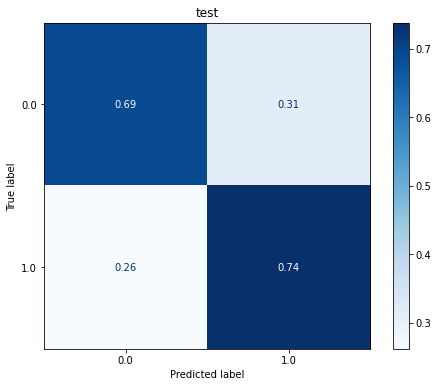

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
plot_confusion_matrix(rf_clf, X_test, y_test,ax=ax, cmap='Blues',normalize='true')   
# plt.rcParams["figure.figsize"] = (20,3)
plt.title('test')
plt.show()

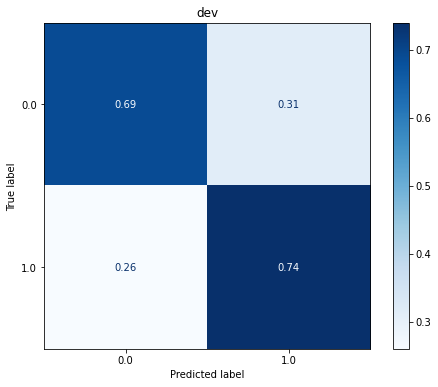

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
plot_confusion_matrix(rf_clf, X_dev, y_dev,ax=ax, cmap='Blues',normalize='true')   
# plt.rcParams["figure.figsize"] = (20,3)
plt.title('dev')
plt.show()

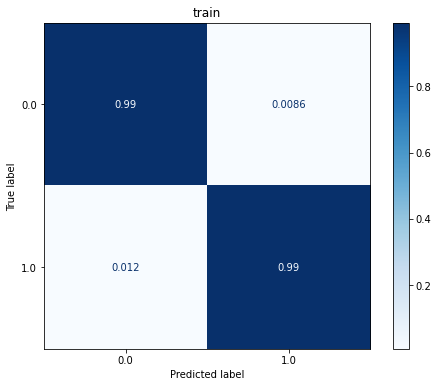

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
plot_confusion_matrix(rf_clf, X_train, y_train,ax=ax, cmap='Blues',normalize='true')   
# plt.rcParams["figure.figsize"] = (20,3)
plt.title('train') 
plt.show()